In [4]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pygenesys as pg
from plotter import *
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,12)

/home/sdotson/research/2021-dotson-ms/plotter.py:266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(axes, labels=techs, loc='right',bbox_to_anchor=(1.3, 0.75), fontsize=21)


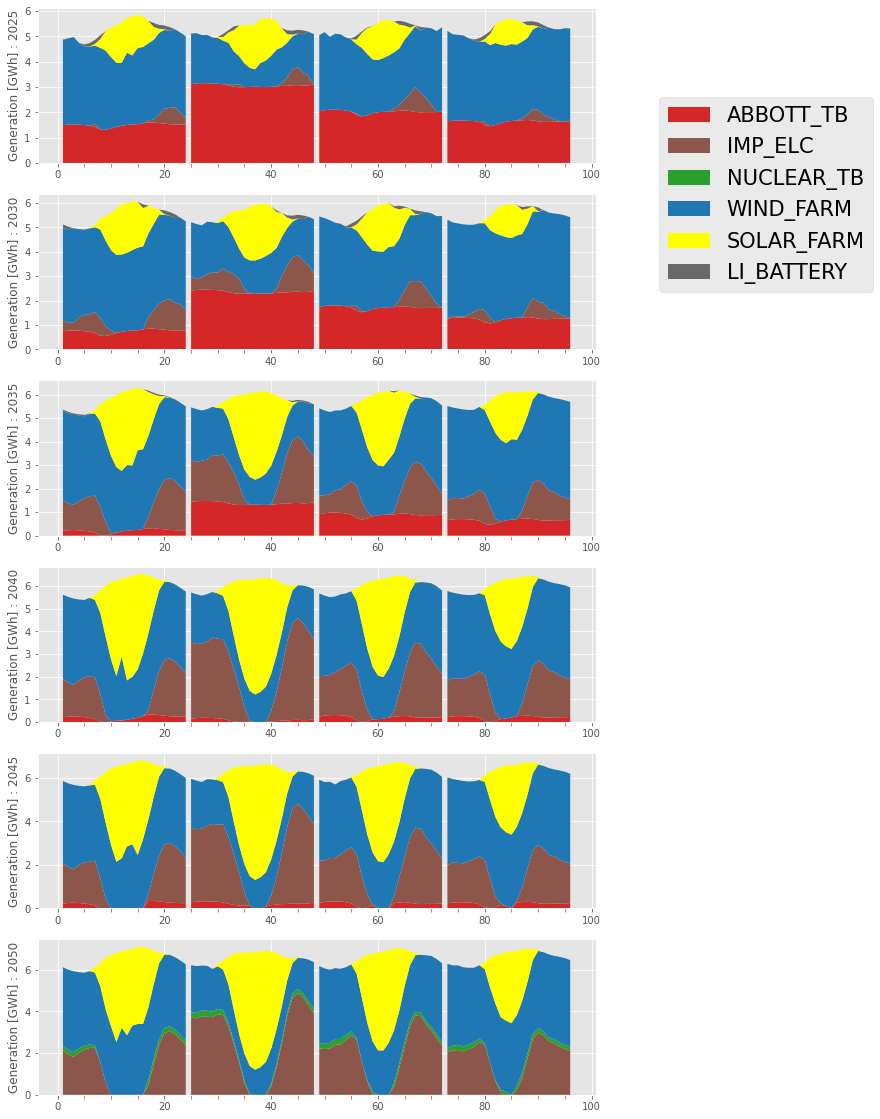

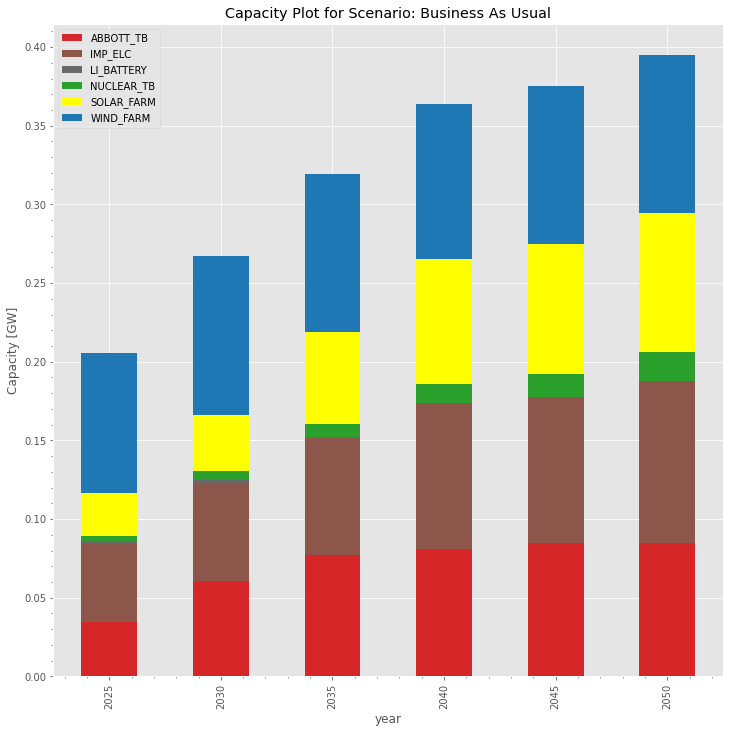

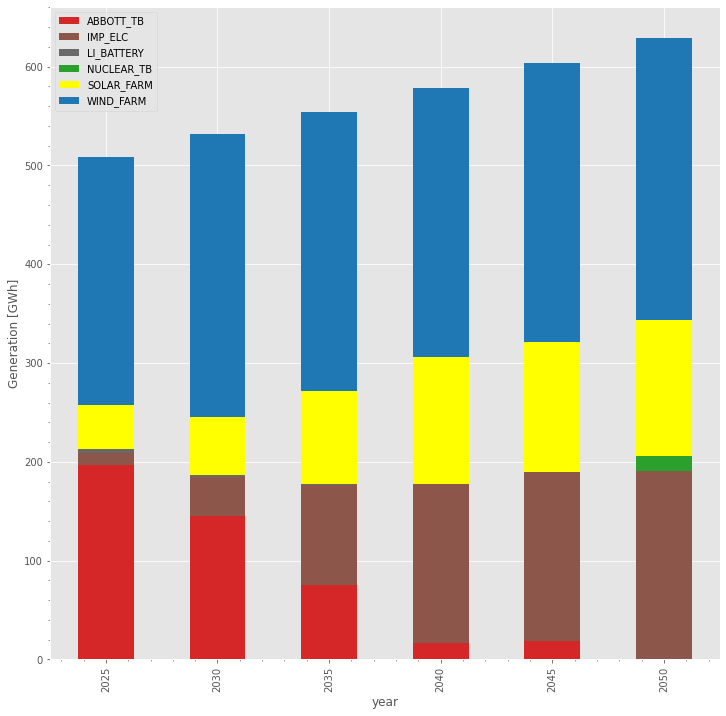

In [5]:
sim_path = "/home/sdotson/research/2021-dotson-ms/simulations/uiuc/data_files/UIUC_CC30_4.sqlite"
sim_path = "/home/sdotson/research/2021-dotson-ms/simulations/uiuc/data_files/UIUC_CC30_4.sqlite"

conn = sqlite3.connect(sim_path)
cursor = conn.cursor()

plot_electricity_profiles(conn,'UIUC','ELC')
cap_df = get_annual_capacity(conn, 'UIUC', 'ELC' )
(cap_df/1000).plot(kind='bar', stacked=True, color=elc_colors)
plt.title('Capacity Plot for Scenario: Business As Usual')
plt.ylabel('Capacity [GW]')
plt.minorticks_on()
plt.show()
gen_df = get_annual_generation(conn, 'UIUC', 'ELC' )
(gen_df).plot(kind='bar', stacked=True, color=elc_colors)
plt.ylabel('Generation [GWh]')
plt.minorticks_on()
plt.show()

In [6]:
cap_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM
year,,,,,,
2025,34.510070,50.000000,1.673830,2.962515,27.569042,89.157882
2030,60.852926,62.042175,1.673830,6.186820,35.691337,100.500000
2035,77.030610,74.201185,0.669532,8.735177,58.024723,100.500000
2040,80.782528,92.888495,0.000000,11.996478,79.436928,98.520866
2045,84.577497,92.888495,0.000000,15.062983,82.199205,100.500000
2050,84.577497,103.406470,0.000000,18.157340,88.225630,100.500000


In [25]:
gen_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM
year,,,,,,
2025,198.908046,25.079604,0.211325,0.000000,45.586914,233.593143
2030,123.750008,55.503449,0.181868,0.000000,64.639982,284.417311
2035,22.428705,132.396070,2.759498,0.000000,122.532828,276.750356
2040,13.745003,149.051464,2.686751,0.000000,141.325696,275.120718
2045,18.047706,168.482616,0.984026,0.000000,138.808188,278.639926
2050,0.000000,0.000000,146.125424,23.689925,365.299923,276.425695


In [26]:
def get_curtailed(conn):
    command = "SELECT t_periods,tech, SUM(curtailment) FROM Output_Curtailment GROUP BY (t_periods)"
    
    cursor= conn.cursor()
    d = cursor.execute(command)
    for i in d.description:
        print(i)
    data = cursor.fetchall()
    for j in data:
        print(j)
    return

In [27]:
get_curtailed(conn)

('t_periods', None, None, None, None, None, None)
('tech', None, None, None, None, None, None)
('SUM(curtailment)', None, None, None, None, None, None)
(2025, 'WIND_FARM', 3.7175693045)
(2030, 'WIND_FARM', 2.796408257)
(2035, 'WIND_FARM', 10.374839731)
(2040, 'WIND_FARM', 13.240160781000005)
(2045, 'WIND_FARM', 8.485269402)
(2050, 'SOLAR_FARM', 41.465300113)


/home/sdotson/research/2021-dotson-ms/plotter.py:266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(axes, labels=techs, loc='right',bbox_to_anchor=(1.3, 0.75), fontsize=21)


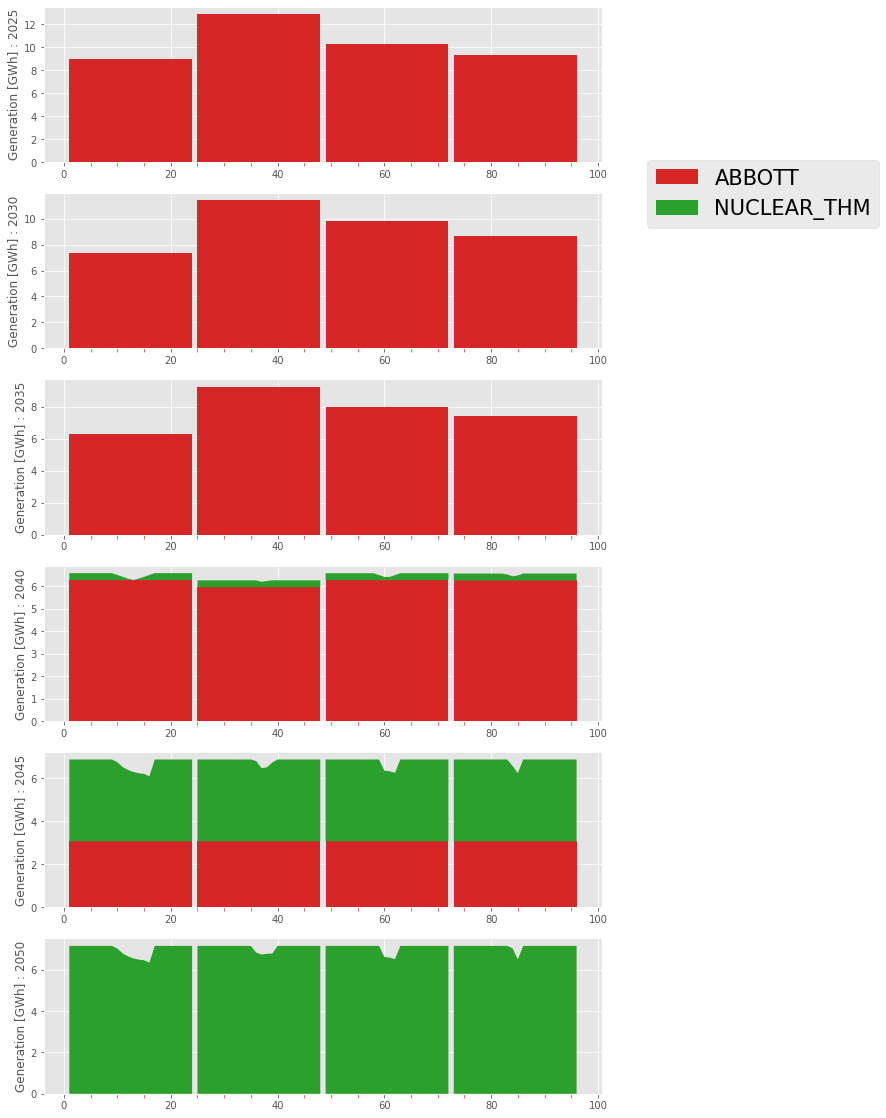

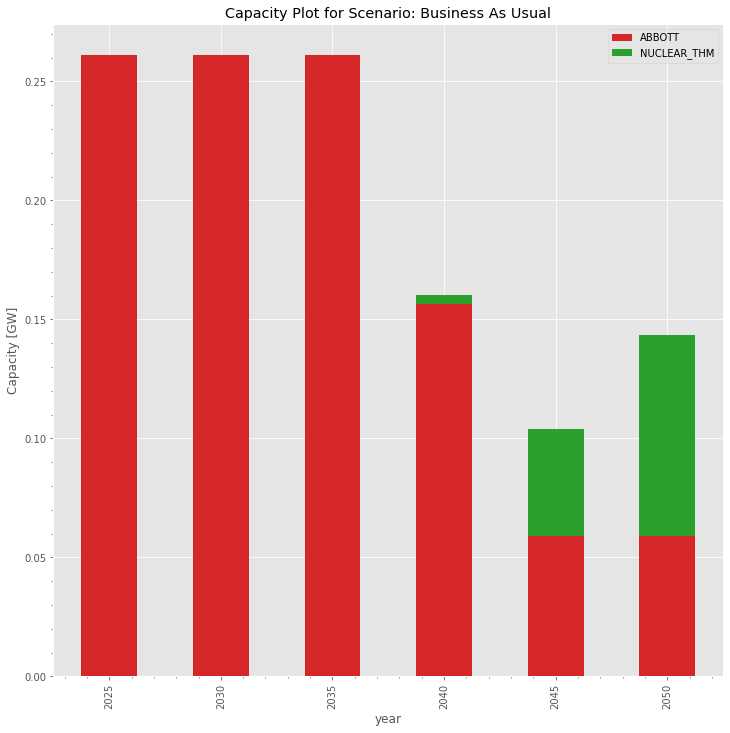

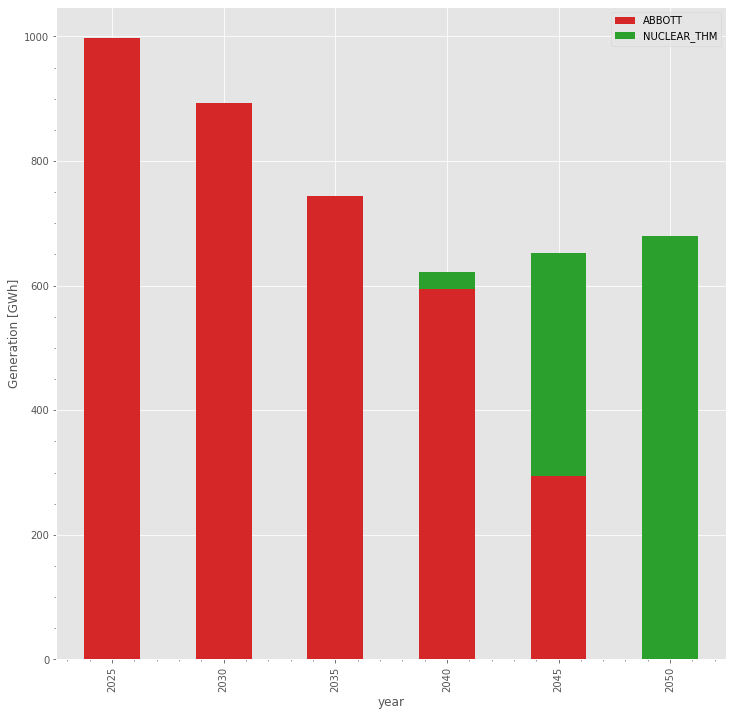

In [7]:
sim_path = "/home/sdotson/research/2021-dotson-ms/simulations/uiuc/data_files/UIUC_CC30_4.sqlite"
sim_path = "/home/sdotson/research/2021-dotson-ms/simulations/uiuc/data_files/UIUC_CC30_4.sqlite"

conn = sqlite3.connect(sim_path)
cursor = conn.cursor()

sector = ['NUC_STM','STM']

plot_electricity_profiles(conn,'UIUC',sector)
cap_df = get_annual_capacity(conn, 'UIUC', sector )
(cap_df/1000).plot(kind='bar', stacked=True, color=elc_colors)
plt.title('Capacity Plot for Scenario: Business As Usual')
plt.ylabel('Capacity [GW]')
plt.minorticks_on()
plt.show()
gen_df = get_annual_generation(conn, 'UIUC', sector )
(gen_df).plot(kind='bar', stacked=True, color=elc_colors)
plt.ylabel('Generation [GWh]')
plt.minorticks_on()
plt.show()

In [8]:
cap_df

,ABBOTT,NUCLEAR_THM
year,,
2025,261.030000,0.000000
2030,261.030000,0.000000
2035,261.030000,0.000000
2040,156.618000,3.597453
2045,59.029028,44.795827
2050,59.029028,84.348863


/home/sdotson/research/2021-dotson-ms/plotter.py:266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(axes, labels=techs, loc='right',bbox_to_anchor=(1.3, 0.75), fontsize=21)


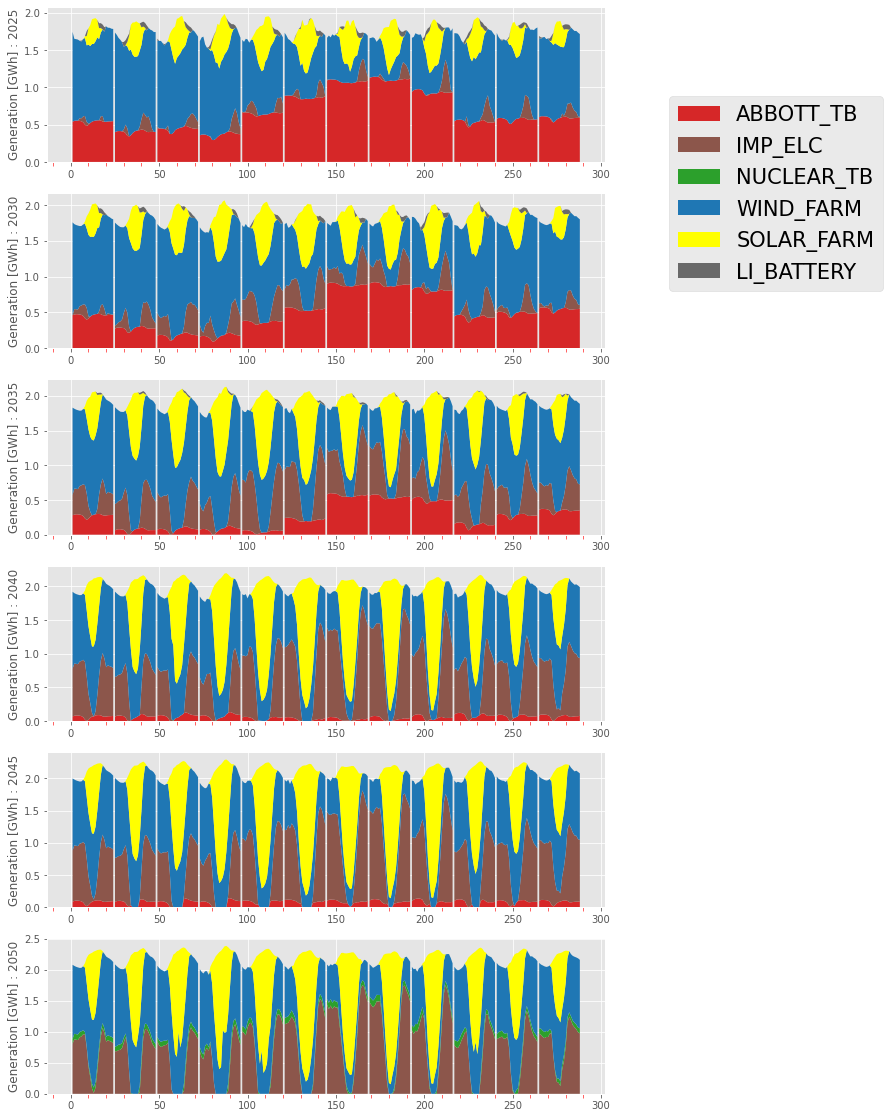

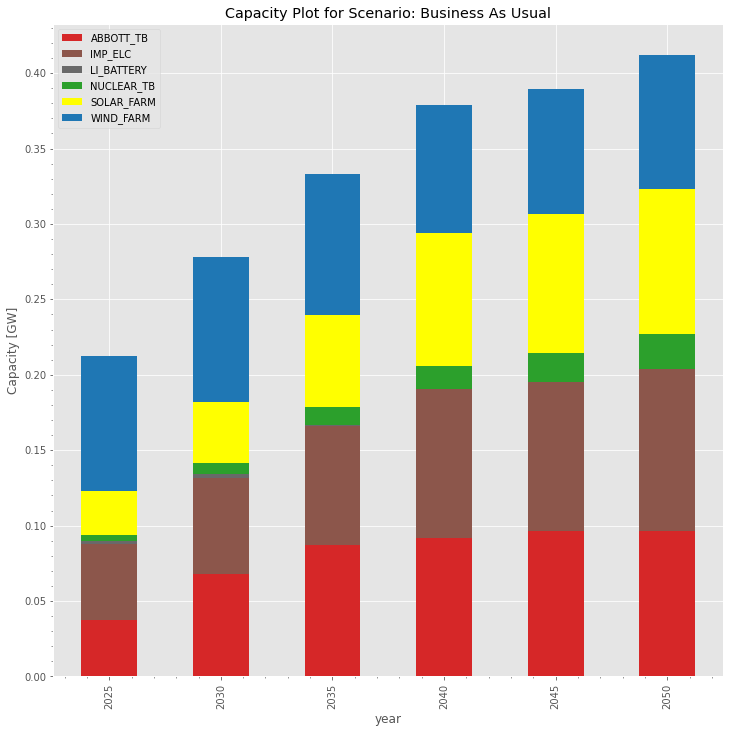

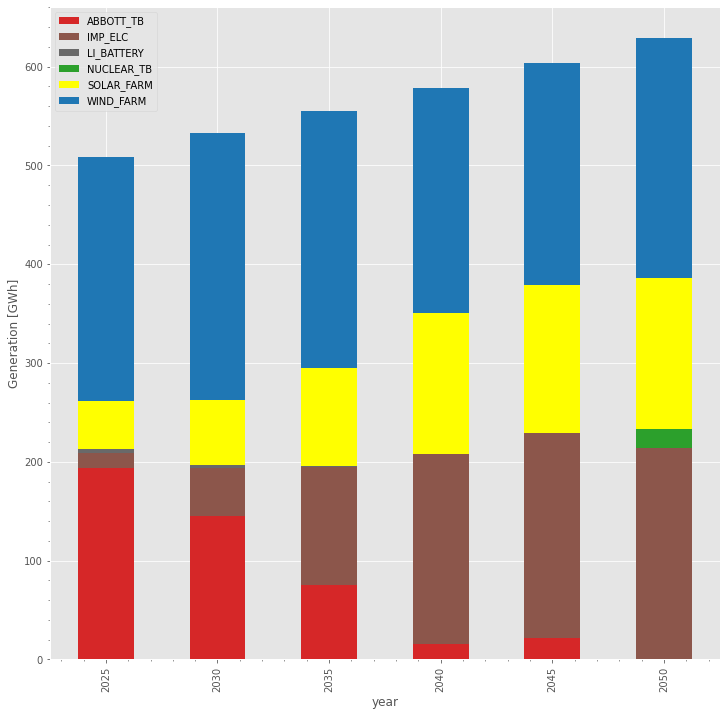

In [9]:
sim_path = "/home/sdotson/research/2021-dotson-ms/simulations/uiuc/data_files/UIUC_CC30_12.sqlite"

conn = sqlite3.connect(sim_path)
cursor = conn.cursor()

plot_electricity_profiles(conn,'UIUC','ELC')
cap_df = get_annual_capacity(conn, 'UIUC', 'ELC' )
(cap_df/1000).plot(kind='bar', stacked=True, color=elc_colors)
plt.title('Capacity Plot for Scenario: Business As Usual')
plt.ylabel('Capacity [GW]')
plt.minorticks_on()
plt.show()
gen_df = get_annual_generation(conn, 'UIUC', 'ELC' )
(gen_df).plot(kind='bar', stacked=True, color=elc_colors)
plt.ylabel('Generation [GWh]')
plt.minorticks_on()
plt.show()

In [11]:
cap_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM
year,,,,,,
2025,37.571512,50.000000,2.151612e+00,3.800040,29.612172,89.319765
2030,67.812476,63.908458,2.151612e+00,7.868757,40.161770,96.193717
2035,87.358713,78.706108,8.606451e-01,11.740869,60.946550,93.398731
2040,91.916657,98.631617,1.364563e-07,15.452083,87.830762,84.784778
2045,96.420447,98.631617,0.000000e+00,19.180568,92.290376,82.820547
2050,96.420447,107.633610,0.000000e+00,23.110307,95.849099,88.866623


In [12]:
gen_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM
year,,,,,,
2025,193.573846,15.355617,4.383272,0.000000,48.161267,247.124874
2030,145.004196,48.541426,3.347544,0.000000,65.318105,270.241984
2035,75.079188,119.717634,1.157471,0.000000,99.119199,259.797831
2040,16.005126,192.419679,-0.000002,0.015214,142.605841,227.534283
2045,22.008420,207.402141,0.000000,0.000000,150.101051,224.224187
2050,0.000000,213.959535,0.000000,18.865785,153.633003,242.435567


/home/sdotson/research/2021-dotson-ms/plotter.py:266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(axes, labels=techs, loc='right',bbox_to_anchor=(1.3, 0.75), fontsize=21)


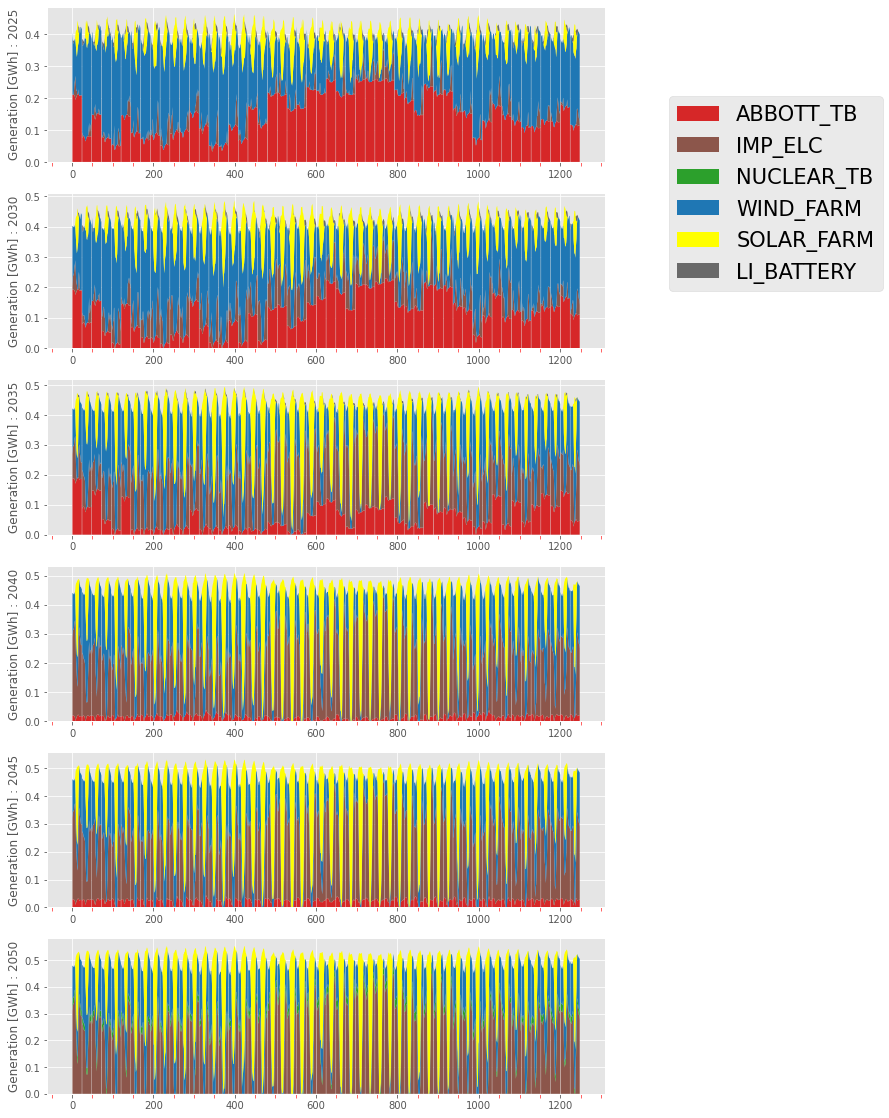

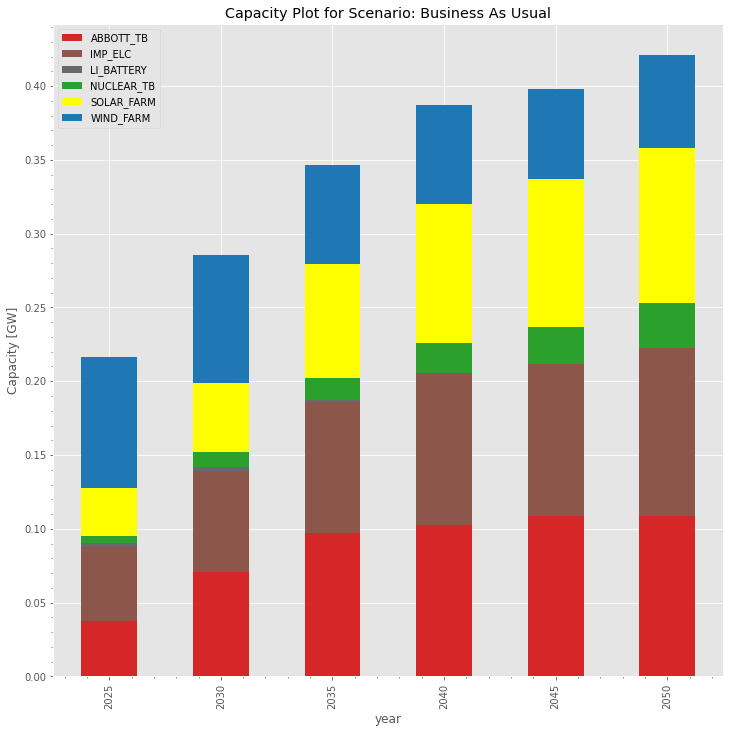

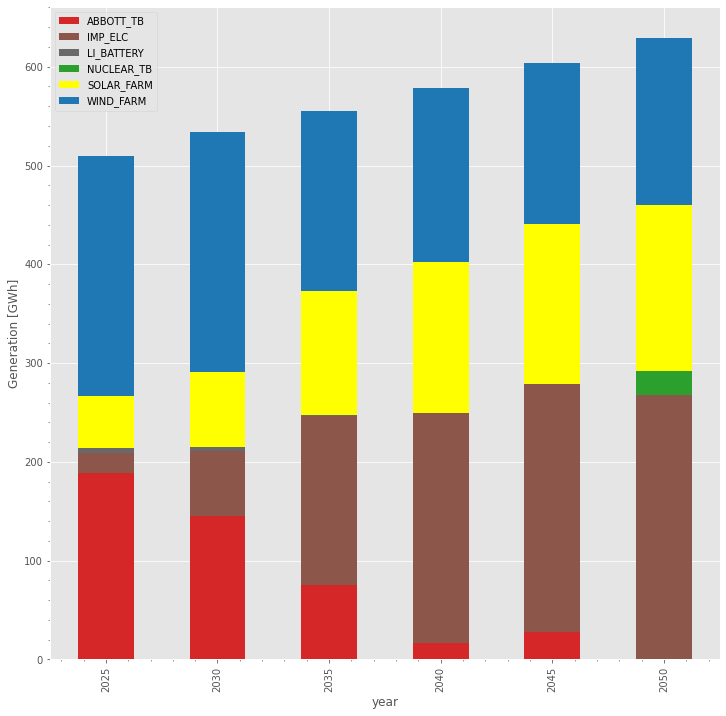

In [13]:
sim_path = "/home/sdotson/research/2021-dotson-ms/simulations/uiuc/data_files/UIUC_CC30_52.sqlite"

conn = sqlite3.connect(sim_path)
cursor = conn.cursor()

plot_electricity_profiles(conn,'UIUC','ELC')
cap_df = get_annual_capacity(conn, 'UIUC', 'ELC' )
(cap_df/1000).plot(kind='bar', stacked=True, color=elc_colors)
plt.title('Capacity Plot for Scenario: Business As Usual')
plt.ylabel('Capacity [GW]')
plt.minorticks_on()
plt.show()
gen_df = get_annual_generation(conn, 'UIUC', 'ELC' )
(gen_df).plot(kind='bar', stacked=True, color=elc_colors)
plt.ylabel('Generation [GWh]')
plt.minorticks_on()
plt.show()

In [14]:
cap_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM
year,,,,,,
2025,37.534091,50.000000,2.630745e+00,5.238940,32.470167,88.805607
2030,70.486239,68.499133,2.630745e+00,10.276600,46.592715,87.065607
2035,97.399633,88.648787,1.052298e+00,15.246922,77.166896,66.988902
2040,102.912370,102.663160,8.454535e-09,20.436512,94.282796,66.988902
2045,108.951160,102.663160,8.454535e-09,25.440376,99.844803,60.960731
2050,108.951160,113.818440,8.454535e-09,30.369017,104.813400,62.988132


In [15]:
gen_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM
year,,,,,,
2025,188.313895,20.539018,5.262836e+00,0.000000,52.865613,242.720575
2030,144.965905,65.969633,4.111049e+00,0.000000,75.899582,242.468248
2035,74.847241,171.245739,1.383498e+00,0.000000,125.479651,182.202759
2040,16.495403,232.734494,0.000000e+00,0.027186,152.986122,176.342986
2045,27.694012,251.601641,0.000000e+00,0.002373,161.842525,162.601560
2050,0.000000,267.618896,-5.281651e-09,23.912436,168.974760,168.400142


In [12]:
ofv = 89033e6
cc30_ofv = 130271e6  # dollars
demand = 1267698.8
# demand = 6338493.91422408
cc30_ofv / demand / 1e6 # dollars per kWh

0.10276179168111542

In [2]:
175e3/1267698.8

0.13804540952472305